[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (3, 1), (3, 3), (4, 3), (4, 4)], [(3, 0)], [(4, 0)]]
3


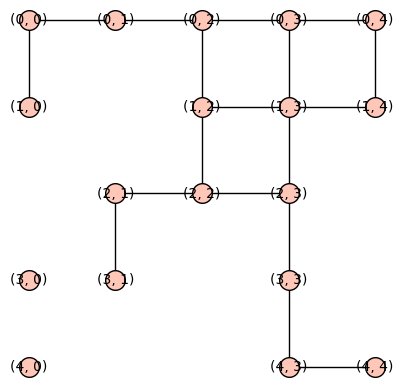

Graf ni enodelen.
{(0, 0): {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (0, 4): 4, (1, 0): 1, (1, 2): 3, (1, 3): 4, (1, 4): 5, (2, 1): 5, (2, 2): 4, (2, 3): 5, (3, 1): 6, (3, 3): 6, (4, 3): 7, (4, 4): 8}, (0, 1): {(0, 0): 1, (0, 1): 0, (0, 2): 1, (0, 3): 2, (0, 4): 3, (1, 0): 2, (1, 2): 2, (1, 3): 3, (1, 4): 4, (2, 1): 4, (2, 2): 3, (2, 3): 4, (3, 1): 5, (3, 3): 5, (4, 3): 6, (4, 4): 7}, (0, 2): {(0, 0): 2, (0, 1): 1, (0, 2): 0, (0, 3): 1, (0, 4): 2, (1, 0): 3, (1, 2): 1, (1, 3): 2, (1, 4): 3, (2, 1): 3, (2, 2): 2, (2, 3): 3, (3, 1): 4, (3, 3): 4, (4, 3): 5, (4, 4): 6}, (0, 3): {(0, 0): 3, (0, 1): 2, (0, 2): 1, (0, 3): 0, (0, 4): 1, (1, 0): 4, (1, 2): 2, (1, 3): 1, (1, 4): 2, (2, 1): 4, (2, 2): 3, (2, 3): 2, (3, 1): 5, (3, 3): 3, (4, 3): 4, (4, 4): 5}, (0, 4): {(0, 0): 4, (0, 1): 3, (0, 2): 2, (0, 3): 1, (0, 4): 0, (1, 0): 5, (1, 2): 3, (1, 3): 2, (1, 4): 1, (2, 1): 5, (2, 2): 4, (2, 3): 3, (3, 1): 6, (3, 3): 4, (4, 3): 5, (4, 4): 6}, (1, 0): {(0, 0): 1, (0, 1): 2, (0, 2): 3, (0, 3): 4

KeyError: (3, 0)

In [11]:
%%time

from sage.graphs.connectivity import connected_components
from sage.graphs.connectivity import connected_components_number


def mreza1(m,n,a):
    mreza = graphs.Grid2dGraph(m,n)
    i = 0
    while i < a:
        mreza.delete_vertex(mreza.random_vertex())
        i = i+1
    return mreza

def mreza2(m,n,a):
    mreza = graphs.Grid2dGraph(m,n)
    i = 0
    while i < a:
        mreza.delete_edge(mreza.random_edge())
        i = i+1
    return mreza

def mreza(m,n,a,b): #m x n mreža, a št. izbrisanih vozlov, b št.izrbirsanih povezav
    mreza = graphs.Grid2dGraph(m,n)
    if a > mreza.order():
        print("Za ukaz je na voljo premalo vozlov.")
    else:
        i = 0
        while i < a:
            mreza.delete_vertex(mreza.random_vertex())
            i = i+1
        i = 0
    if b > mreza.size():
        print("Za ukaz je na voljo premalo povezav.")
    else:
        while i < b:
            mreza.delete_edge(mreza.random_edge())
            i = i+1
    return mreza

def enodelengraf(G):
    razdalje = G.distance_all_pairs()
    a = razdalje[(0,0)]
    if len(a) == G.order():
        print("Graf je enodelen.")
    else:
        print("Graf ni enodelen.")

#G = graphs.Grid2dGraph(3, 3) # mreža 3x3
#G.delete_vertex(G.random_vertex())
#G.delete_edge(G.random_edge())

G = mreza(5,5,7,2)
K = 2

print(connected_components(G)) #večdelni graf zapiše po ločenih delih
print(connected_components_number(G)) #št. delov


slika=G.show()
        
enodelengraf(G)

razdalje = G.distance_all_pairs()
print(razdalje)

p = MixedIntegerLinearProgram(maximization=False)
x = p.new_variable(binary=True) #x_uv = 1 če mesto u spada k skladišču v (mestu v s skladiščem)
y = p.new_variable(binary=True) # y_v = 1 če je v mestu v skladišče

p.set_objective(p['R']) # največja razdalja je spremenljivka

for u in G:
    p.add_constraint(sum(x[u, v] for v in G) == 1) #za vsako mesto u bo veljalo, da spada pod neko območje mesta v s skladiščem

p.add_constraint(sum(y[v] for v in G) == K) #vsota skladišč je enaka K

for u in G:
    for v in G:
        p.add_constraint(x[u, v] <= y[v]) #ne sme se zgoditi, da mesto u pade v območje mesta v, v mestu v pa sploh ni skladišča

for u in G:
    for v in G:
        p.add_constraint(razdalje[u][v] * x[u, v] <= p['R']) # za vsako obstoječo povezavo med mestom in skladiščem mora veljati, da je ta manjša od R

max_razdalja = p.solve()
print(max_razdalja)


skladisca = [k for k, v in p.get_values(y).items() if v == 1]
print(skladisca)